# Data Structures and Algorithms

## Algorithm Analysis and Big-O Notation

More information:
- [Big O Cheat Sheet](https://www.bigocheatsheet.com/)
- [What is a plain English explanation of “Big O” notation?](https://stackoverflow.com/questions/487258/what-is-a-plain-english-explanation-of-big-o-notation)
- [What does O(log n) mean exactly?](https://stackoverflow.com/questions/2307283/what-does-olog-n-mean-exactly)

**Why analyze algorithms?**

Before we begin, let's clarify what an algorthim is. In this course, an algorithm is simply a procedure or formula for solving a problem. Some problems are famous enough that the algorithms have names, as well as some procdures being common enough that the algorithm associated with it also has a name. So now we have a good question we need to answer:

**How do analyze algorithms and how can we compare algorithms against each other?**

Imagine if you and a friend both came up with functions to sum the numbers from 0 to N. How would you compare the functions and algorithms within the functions? Let's say you both cam up with these two seperate functions:

In [1]:
def sum1(n):
    final_sum = 0
    
    for x in range(n + 1):
        final_sum += x
        
    return final_sum

In [2]:
%timeit sum1(100)

2.83 µs ± 76 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [3]:
def sum2(n):
    return int(n * (n + 1) / 2)

In [4]:
%timeit sum2(100)

163 ns ± 2.78 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


You'll notice both functions have the same result, but completely different algorithms. You'll note that the first function iteratively adds the numbers, while the second function makes use of:

$$
    \sum_{i=0}^{n}\frac{x_i(x_i + 1)}{2}
$$

So how can we objectively compare the algorithms? We could compare the amount of space they take in memory or we could also compare how much time it takes each function to run. We can use the built in `%timeit` magic function in jupyter to compare the time of the functions. The `%timeit` magic in Jupyter Notebooks will repeat the loop iteration a certain number of times and take the best result. Check out the link for the documentation.

Let's go ahead and compare the time it took to run the functions:

We can see that the second function is much more efficient! Running at a much faster rate than the first. However, we can not use "time to run" as an objective measurement, because that will depend on the speed of the computer itself and hardware capabilities. So we will need to use another method, Big-O!

In the next lecture we will discuss Big-O notation and why its so important!

### Notation

Now we want to develop a notation to objectively compare the efficiency of these two algorithms. A good place to start would be to compare the number of assignments each algorithm makes.

The original `sum1` function will create an assignment n+1 times, we can see this from the range based function. This means it will assign the `final_sum` variable `n+1` times. We can then say that for a problem of n size (in this case just a number n) this function will take `1+n` steps.

This n notation allows us to compare solutions and algorithms relative to the size of the problem, since `sum1(10)` and `sum1(100000)` would take very different times to run but be using the same algorithm. We can also note that as n grows very large, the +1 won't have much effect. So let's begin discussing how to build a syntax for this notation.

Now we will discuss how we can formalize this notation and idea.

Big-O notation describes how quickly runtime will grow relative to the input as the input get arbitrarily large.

Let's examine some of these points more closely:

- Remember, we want to compare how quickly runtime will grows, not compare exact runtimes, since those can vary depending on hardware.
- Since we want to compare for a variety of input sizes, we are only concerned with runtime grow relative to the input. This is why we use n for notation.
- As $n$ gets arbitrarily large we only worry about terms that will grow the fastest as n gets large, to this point, Big-O analysis is also known as asymptotic analysis

As for syntax `sum1()` can be said to be O(n) since its runtime grows linearly with the input size. In the next lecture we will go over more specific examples of various O() types and examples. To conclude this lecture we will show the potential for vast difference in runtimes of Big-O functions.

### Runtimes of Common Big-O Functions

Here is a table of common Big-O functions:

- Constant: $1$
- Logarithmic: $\log(n)$
- Linear: $n$
- Log Linear: $n\log(n)$
- Quadratic: $n^2$
- Cubic: $n^3$
- Exponential: $2^n$

Now let's plot the runtime versus the Big-O to compare the runtimes. We'll use a simple matplotlib for the plot below. (Don't be concerned with how to use matplotlib, that is irrelevant for this part).

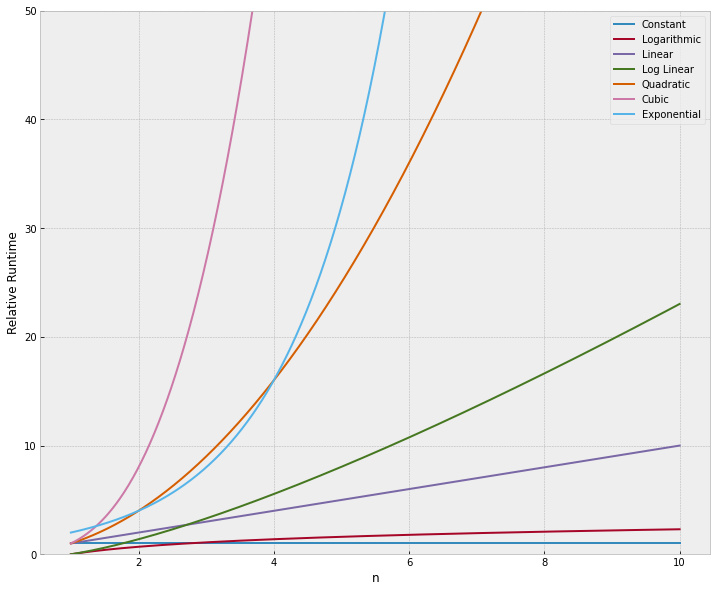

In [5]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Set up runtime comparisons
n = np.linspace(1,10,1000)
labels = ['Constant','Logarithmic','Linear','Log Linear','Quadratic','Cubic','Exponential']
big_o = [np.ones(n.shape),np.log(n),n,n*np.log(n),n**2,n**3,2**n]

# Plot setup
plt.figure(figsize=(12,10))
plt.ylim(0,50)

for i in range(len(big_o)):
    plt.plot(n,big_o[i],label = labels[i])

plt.legend(loc=0)
plt.ylabel('Relative Runtime')
plt.xlabel('n')
plt.show()

Note how much of a difference a Big-O efficiency can make for the same n value against the projected runtime! Clearly we want to choose algorithms that stay away from any exponential, quadratic, or cubic behavior!

In the next lecture we will learn how to properly denote Big-O and look at examples of various problems and calculate the Big-O of them!

## Big-O Examples

### $O(1)$ Constant

In [6]:
numbers = [1,2,3]

In [7]:
def func_constant(values):
    print(values[0])

In [8]:
func_constant(numbers)

1


### $O(n)$ Linear

In [9]:
def func_linear(values):
    for value in values:
        print(value)

In [10]:
func_linear(numbers)

1
2
3


### $O(n^2)$ Quadratic

In [11]:
def func_quadratic(values):
    for value1 in values:
        for value2 in values:
            print(value1, value2)

In [12]:
func_quadratic(numbers)

1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3


### Calculating Scale of Big-O

In this section we will discuss how insignificant terms drop out of Big-O notation.

When it comes to Big O notation we only care about the most significant terms, remember as the input grows larger only the fastest growing terms will matter. If you've taken a calculus class before, this will reminf you of taking limits towards infinity. Let's see an example of how to drop constants:

In [13]:
# O(n)
def print_once(values):
    for value in values:
        print(value)

In [14]:
print_once(numbers)

1
2
3


In [15]:
# 2 * O(n)
def print_2(values):
    for value in values:
        print(value)
        
    for value in values:
        print(value)

In [16]:
print_2(numbers)

1
2
3
1
2
3


In [17]:
def comp(values):
    print(values[0]) # O(1)
    
    midpoint = round(len(values) / 2) # O(1)
    
    for value in values[:midpoint]: # O(n/2)
        print(value)
        
    for x in range(10): #O(10)
        print('hello')

In [18]:
new_numbers = [1,2,3,4,5,6,7,8,9]
comp(new_numbers)

1
1
2
3
4
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello


Adding up the parts of the function:

$$
    O(1 + \frac{1}{2}n + 10)
$$

Overall, this function simplifies to $O(n)$ complexity because `for value in values[:midpoint]:` is the limiting part of the code.

In [19]:
def matcher(values, match):
    for value in values:
        if value == match:
            return True
    return False

In [20]:
matcher(new_numbers, 1) # O(1)

True

In [21]:
matcher(new_numbers, 0) # O(n)

False

The best case is $O(1)$ complexity.

The worst case is $O(n)$ complexity.

## Space Complexity

In [22]:
def create_list(n):
    new_list = []
    
    for num in range(n):
        new_list.append('new')
        
    return new_list

In [23]:
create_list(5)

['new', 'new', 'new', 'new', 'new']

This is $O(n)$ complexity because the output grows equally with the input.

In [24]:
def printer(n):
    for x in range(n): # Time complexity O(n)
        print('hello world') # Space complexity O(1)

In [25]:
printer(10)

hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world


### Big-O of Python Data Structures

#### Lists

In Python lists act as dynamic arrays and support a number of common operations through methods called on them. The two most common operations performed on a list are indexing and assigning to an index position. These operations are both designed to be run in constant time, O(1).

Let's imagine you wanted to test different methods to construct a list that is [0,1,2...10000]. Let go ahead and compare various methods, such as appending to the end of a list, concatenating a list, or using tools such as casting and list comprehension.

In [26]:
def method1():
    l = []
    for n in range(10000):
        l = l + [n]

def method2():
    l = []
    for n in range(10000):
        l.append(n)

def method3():
    l = [n for n in range(10000)]

def method4():
    l = list(range(10000))

In [27]:
%timeit method1()
%timeit method2()
%timeit method3()
%timeit method4()

170 ms ± 9.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
508 µs ± 1.45 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
248 µs ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
116 µs ± 3.61 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### Dictionaries

Dictionaries in Python are an implementation of a hash table. They operate with keys and values, for example:

In [28]:
d = {'k1':1,'k2':2}

In [29]:
d['k1']

1

Something that is pretty amazing is that getting and setting items in a dictionary are O(1)! Hash tables are designed with efficiency in mind, and we will explore them in much more detail later on in the course as one of the most important data structures to undestand. In the meantime, refer to the table below for Big-O efficiencies of common dictionary operations:

## Arrays

In low-level abstraction, an array is a contiguous sequence of cells in memory. Each cell is accessed by a memory address.

In high-level abstraction, arrays are named. The index starts at 0 and cell indices are offset from the head (0) of the array.

A referential array contains memory references to other objects in memory. If a referential array is changed, then only the referential array itself is changed, not the objects that the referential array is pointing to.

The three main arrays in Python: `List()`, `Tuple()`, `String()`.

### Dynamic Arrays

A list instance often has greater capacity than current length. Space can run out if elements keep getting appended.

The following is an example of dynamic array sizing:

In [30]:
# A dynamic array will resize in chunks
import sys

n = 20
data = []

for i in range(n):
    a = len(data)
    b = sys.getsizeof(data)
    
    print(f'Length: {a}; size in bytes: {b}')
    
    data.append(n)

Length: 0; size in bytes: 56
Length: 1; size in bytes: 88
Length: 2; size in bytes: 88
Length: 3; size in bytes: 88
Length: 4; size in bytes: 88
Length: 5; size in bytes: 120
Length: 6; size in bytes: 120
Length: 7; size in bytes: 120
Length: 8; size in bytes: 120
Length: 9; size in bytes: 184
Length: 10; size in bytes: 184
Length: 11; size in bytes: 184
Length: 12; size in bytes: 184
Length: 13; size in bytes: 184
Length: 14; size in bytes: 184
Length: 15; size in bytes: 184
Length: 16; size in bytes: 184
Length: 17; size in bytes: 256
Length: 18; size in bytes: 256
Length: 19; size in bytes: 256


### How to implement a dynamic array

Provide a means to grow an array A that stores the elements of a list. We can't actually grow the array, its capacity is fixed. If an element is appended when capacity is full...

1. Allocate a new array B with larger capacity
1. set `B[i] = A[i]` for `i = 0, ..., n-1` where `n` is number of current items.
1. set `A = B`, henceforth we use B as the array supporting the list.
1. Insert the new element into the array.

Common rule is to create a new array twice as large as the current array.

In [31]:
import ctypes

class DynamicArray(object):
    
    def __init__(self):
        self.n = 0
        self.capacity = 1
        self.A = self.make_array(self.capacity)
        
    def __len__(self):
        return self.n
    
    def __getitem__(self, k):
        if not 0 <= k < self.n:
            return IndexError('K is out of bounds!')
        return self.A[k]
    
    def append(self, elem):
        if self.n == self.capacity:
            self._resize(2 * self.capacity) # 2x if capacity isn't enough
            
        self.A[self.n] = elem
        self.n += 1
        
    def _resize(self, new_cap):
        B = self.make_array(new_cap)
        
        for k in range(self.n):
            B[k] = self.A[k]
            
        self.A = B
        self.capacity = new_cap
        
    def make_array(self, new_cap):
        return (new_cap * ctypes.py_object)()

In [32]:
arr = DynamicArray()

In [33]:
arr.append(1)
len(arr)

1

In [34]:
arr.append(2)
len(arr)

2

In [36]:
arr[1]

2

In [37]:
arr[2]

IndexError('K is out of bounds!')

### Amortized Analysis

More information: [http://www.cs.cmu.edu/afs/cs/academic/class/15451-s10/www/lectures/lect0203.pdf](http://www.cs.cmu.edu/afs/cs/academic/class/15451-s10/www/lectures/lect0203.pdf)

Replacing an array with a new array might seem slow. A single append operation may require `O(n)` time. The new array allows us to add `n` new elements before the array must be replaced.

**Amortization**: algorithmic design pattern to show operations on array are efficient.

The amortized cost is: `[n + 2n] \ n` or `O(1)`.